In [7]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras


# Keras를 활용한 심층 신경망 실습 - 보스턴 주택가격 회귀 계측

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
# 랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [10]:
# 데이터 수집 및 전처리
from sklearn.datasets import fetch_openml

boston = fetch_openml('boston')

X = boston.data
y = boston.target

# 딥러닝 모델 성능 개선을 위한 피처 스케일링 (MinMaxScaler)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습-검증 데이터셋 분할

from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, shuffle=True, random_state=SEED)


In [11]:
# 모델 구조 구현(심층 신경망)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='linear'))

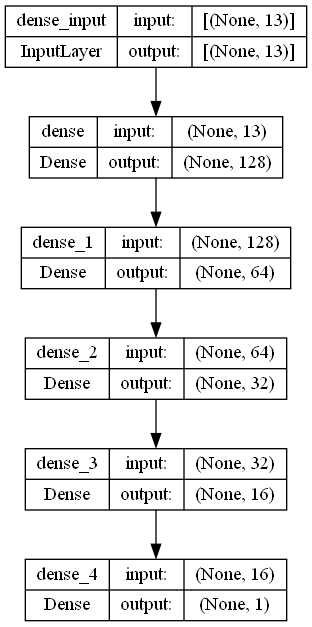

In [12]:
# 모델 구조 시각화

from keras.utils import plot_model

plot_model(model,show_shapes=True, show_layer_names=True)

In [13]:
# 모델 컴파일

model.compile(loss='mse',optimizer='adam',metrics='mae')

In [14]:
# 모델 구조 요약


In [19]:
# 모델 학습
# batch size 기본값 : 32 404/32 = 13
hist = model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=2)


Epoch 1/100
13/13 - 0s - loss: 8.7945 - mae: 2.0782 - 19ms/epoch - 1ms/step
Epoch 2/100
13/13 - 0s - loss: 8.5503 - mae: 2.0743 - 20ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 8.9836 - mae: 2.1380 - 16ms/epoch - 1ms/step
Epoch 4/100
13/13 - 0s - loss: 8.8387 - mae: 2.1001 - 23ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 8.3882 - mae: 2.0422 - 22ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 8.6031 - mae: 2.0756 - 30ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 8.2110 - mae: 2.0164 - 30ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 8.2907 - mae: 2.0451 - 30ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 8.8407 - mae: 2.1096 - 33ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 8.3471 - mae: 2.0729 - 21ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 8.6510 - mae: 2.0860 - 34ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 8.7752 - mae: 2.2071 - 24ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 8.3687 - mae: 2.0556 - 34ms/epoch - 3ms/step
Epoch 14

In [21]:
# 모델 성능 평가
df = pd.DataFrame(hist.history)

AttributeError: module 'matplotlib.pyplot' has no attribute 'legned'

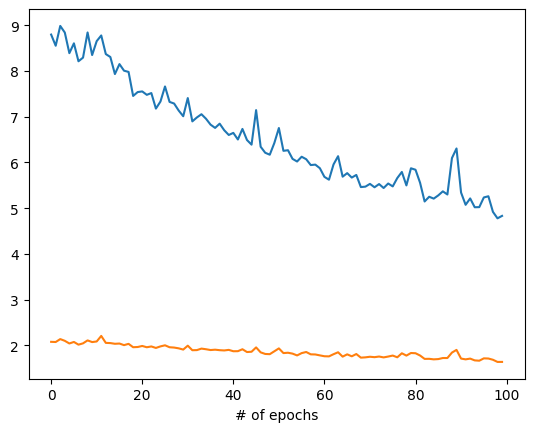

In [22]:
# 모델 학습 과정 시각화

import matplotlib.pyplot as plt

plt.plot(df.loss, label = 'loss')
plt.plot(df.mae, label='mae')
plt.xlabel('# of epochs')
plt.legned()
plt.grid()

In [ ]:
# 훈련 데이터의 손실함수값과 검증 데이터의 손실함수값을 에포크별로 비교하여 시각화



In [23]:
y_pred = model.predict(X_test)
len(y_pred)

4/4 [==============================] - 0s 2ms/step


102

In [24]:
# r2_score로 성능 평가

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.8559795457870136

In [ ]:
# 수정해야해
